In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
!pip install pyLDAvis


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd

# Display full pandas table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [ ]:
import string
import re 
import numpy as np
from nltk.corpus import stopwords, wordnet
from nltk import WordNetLemmatizer, pos_tag, word_tokenize
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

# Data cleaning
def remove_stopwords(words, blacklist=[], whitelist=[]):
    stopwords_list = stopwords.words('english') + blacklist
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    return clean_words

def wnl_lemma(tokens):
    wnl = WordNetLemmatizer()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    toks = []
    toks_tag = pos_tag(tokens)
    for item in toks_tag:
        word = item[0]
        tag = item[1][0].upper() # first letter of pos_tag generated
        tag = tag_dict.get(tag, wordnet.NOUN)
        toks.append(wnl.lemmatize(word, tag))
    return toks


def preprocess(input_text, blacklist=[], whitelist=[]):
    input_text = input_text.replace("\n", " ")
    if input_text.endswith("Helpfu"):
      input_text = input_text[:-len("Helpfu")]
    toks = word_tokenize(input_text)
    toks = [t for t in toks if not t.isnumeric()] # remove tokens that are numbers
    toks = [t.lower() for t in toks if t not in string.punctuation + "’“”" + "''"]
    toks = wnl_lemma(toks)
    toks = remove_stopwords(toks, blacklist, whitelist)

    return toks

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

r = pd.read_csv(r"review_combined.csv", sep=";")
r = r[["company", "review_title", "pros", "cons", "rating_overall"]]

print(r.shape)

(32457, 5)


In [ ]:
r.head(20)

,company,review_title,pros,cons,rating_overall
0,3E ACCOUNTING,Supportive Environment,There is a very welcoming environment and everyone is willing to provide guidance. My mentors are very nice and helpful even though when I first started with 3E Accounting we were all working from home. The training was still very detailed and there are alot of learning opportunities.\n,When I first started I had to learn everything virtually due to the work from home safety measures of Covid19. There were still alot of support but it was not as easy to learn as a new Trainee.\nHelpful (1,5
1,3E ACCOUNTING,Flexible and good atmosphere,Work life balance and good working atmosphere. Friendly colleagues and all are positive work attitude.\n,currently don't have any opinion\n,5
2,3E ACCOUNTING,Good Mentor and Working Environment,Started work during the Circuit Breaker period. My supervisors are approachable and patient. Slowly guiding me through the step. Manage to learn a lot of stuff on the job.\n,Nothing i can think of\n,5
3,3E ACCOUNTING,Manageable,"A lot of things to learn, helpful colleagues, generally manageable workload.\n","Occasional communication errors with colleagues (but considered minor), need to learn to be independent.\n",4
4,3E ACCOUNTING,manageable workload,manageable workload in the company\n,hard to understand some instructions due to wfh and communication through com\n,4
5,3E ACCOUNTING,Digitalized company with great culture,"3E Accounting has been very welcoming to the trainees, where they have on-the-job trainings and mentorship. They also believe in digitization, which enabled us to have a Virtual Onboarding process and full wok-from-home arrangements.\n","Although I prefer face-to-face interactions, due to the COVID-19 situation, we have no choice but to work from home.\n",4
6,3E ACCOUNTING,Supportive Mentor,NaN,NaN,5
7,3E ACCOUNTING,Great mentor guidance,NaN,- Lesser social interactions due to covid-19 wfh arrangement\n,5
8,3E ACCOUNTING,Good accounting firm in Singapore,"Friendly and helpful staff, no politic, good management. Start my employment during Covid period, company able to manage work from home for every employees during the period.\n","Highly depends on tech, traditional job seeker might face challenge.\n",5
9,3E ACCOUNTING,Intern at 3E Accounting,The staff is very nice and friendly and is willing to offer help when you need it which is really important for an intern with little work experience. I generally enjoyed working here.\n,Not much that I can think of.\n,5


In [ ]:
r[["review_title", "pros", "cons"]] = r[["review_title", "pros", "cons"]].fillna("")

r["title_details"] = r["review_title"] + " " + r["pros"] + " " + r["cons"]
print(r.shape)
print(r[r["title_details"].str.contains("Pros\n")].shape)
r[r["title_details"].str.contains("Pros\n")].head(5)

(32457, 6)
(1579, 6)


,company,review_title,pros,cons,rating_overall,title_details
102,AMAZON WEB SERVICES SINGAPORE,Great culture but low compensation,,"ltant in Singapore\nRecommends\nPositive Outlook\nApproves of CEO\nI have been working at Amazon full-time for more than a year\nPros\nBrightest people, very strong culture\nCons\nCompensation is boring! Promotion process too rigid.\n",4,"Great culture but low compensation ltant in Singapore\nRecommends\nPositive Outlook\nApproves of CEO\nI have been working at Amazon full-time for more than a year\nPros\nBrightest people, very strong culture\nCons\nCompensation is boring! Promotion process too rigid.\n"
110,AMAZON WEB SERVICES SINGAPORE,AWS: A life time opportunity,,"ltant in Singapore\nRecommends\nPositive Outlook\nApproves of CEO\nI have been working at Amazon full-time for more than a year\nPros\nThink big: with nearly unlimited cloud power with 120+ services, the sky is the limit in what we can achieve for our customers. Management pushes everyone hard to think much bigger to move the needle more effectively for our customers. Our 14 leadership principles provide good guide in daily decision making process, with large autonomy left to each individual.\nCons\nThe fun part could be increased further, as it has been in recent years. We could share more about what we do on social media, when we have fun.\n",4,"AWS: A life time opportunity ltant in Singapore\nRecommends\nPositive Outlook\nApproves of CEO\nI have been working at Amazon full-time for more than a year\nPros\nThink big: with nearly unlimited cloud power with 120+ services, the sky is the limit in what we can achieve for our customers. Management pushes everyone hard to think much bigger to move the needle more effectively for our customers. Our 14 leadership principles provide good guide in daily decision making process, with large autonomy left to each individual.\nCons\nThe fun part could be increased further, as it has been in recent years. We could share more about what we do on social media, when we have fun.\n"
114,AMAZON WEB SERVICES SINGAPORE,Hard driving culture but with potential to go far,,"ltant in Singapore\nRecommends\nPositive Outlook\nNo Opinion of CEO\nI have been working at Amazon full-time for less than a year\nPros\nVery good investment into employees in terms of training and support. Plenty of opportunities to succeed and to have that success acknowledged, often at a global level. Strong corporate culture focused on customer, they walk the talk.\nCons\nEconomy flying even if you're a regular traveler for work. Work-life balance can be tough at times. Demanding culture, this isn't a place for sitting around. Self-service culture wastes your time doing admin tasks that could be easily offloaded. Due to fast hiring and turnover, hard to get veteran advice at times.\n",4,"Hard driving culture but with potential to go far ltant in Singapore\nRecommends\nPositive Outlook\nNo Opinion of CEO\nI have been working at Amazon full-time for less than a year\nPros\nVery good investment into employees in terms of training and support. Plenty of opportunities to succeed and to have that success acknowledged, often at a global level. Strong corporate culture focused on customer, they walk the talk.\nCons\nEconomy flying even if you're a regular traveler for work. Work-life balance can be tough at times. Demanding culture, this isn't a place for sitting around. Self-service culture wastes your time doing admin tasks that could be easily offloaded. Due to fast hiring and turnover, hard to get veteran advice at times.\n"
701,AMAZON WEB SERVICES SINGAPORE,Highly Manager Dependant,,"ltant in San Francisco, CA\nI have been working at Amazon full-time\nPros\nHaving a wonderful manager matters a lot. \n-Makes life easy\n-Manager pushes to establish a work-life balance\nCons\nWay too big a company to have a significant role unless you join at a higher level\nHelpfu",4,"Highly Manager Dependant ltant in San Francisco, CA\nI have been workin

About 1579 reviews has title / pros / cons column that is not parsed properly and have words like "recommends", "Itant in" and "Pros\n" etc. This will affect the topic modelling later, so we will clean up the "title_details" column.

In [ ]:
def clean_title_details(input_text):
  itant_index = input_text.find("ltant")
  pros_index = input_text.find("Pros\n")
  if itant_index != -1 and pros_index != -1:
    before_itant = input_text[: itant_index]
    after_pros = input_text[pros_index:]
    cleaned_string = before_itant + " " + after_pros
    cleaned_string = cleaned_string.replace("Pros\n", " ")
    cleaned_string = cleaned_string.replace("Cons\n", " ")
    return cleaned_string
  else:
    return input_text

r["title_details"] = r["title_details"].map(lambda x: clean_title_details(str(x)))

In [ ]:
blacklist = ["work", "company", "good", "great", "employee", "people", "pro", "con"]
r["td_toks"] = r["title_details"].map(lambda x: preprocess(str(x), blacklist=blacklist))

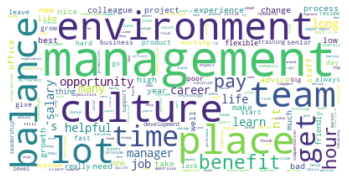

[('management', 11064),
 ('culture', 6878),
 ('place', 6754),
 ('environment', 6589),
 ('lot', 5644),
 ('balance', 5581),
 ('team', 5563),
 ('time', 5524),
 ('get', 5338),
 ('benefit', 5208),
 ('pay', 4928),
 ('hour', 4920),
 ('opportunity', 4842),
 ('life', 4765),
 ('manager', 4449),
 ('learn', 4363),
 ('job', 4320),
 ('helpful', 4183),
 ('salary', 4084),
 ('career', 3981),
 ("n't", 3711),
 ('long', 3690),
 ("'s", 3627),
 ('many', 3546),
 ('experience', 3368),
 ('make', 3351),
 ('staff', 3340),
 ('high', 3205),
 ('advice', 3180),
 ('much', 3073),
 ('nice', 3009),
 ('project', 2793),
 ('new', 2770),
 ('like', 2762),
 ('colleague', 2747),
 ('need', 2740),
 ('bad', 2653),
 ('change', 2568),
 ('process', 2494),
 ('year', 2477),
 ('best', 2474),
 ('take', 2443),
 ('growth', 2435),
 ('low', 2383),
 ('office', 2334),
 ('well', 2326),
 ('really', 2273),
 ('friendly', 2258),
 ('one', 2255),
 ('thing', 2245),
 ('flexible', 2230),
 ('product', 2158),
 ('grow', 2101),
 ('lack', 2094),
 ('working'

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

toks = list(r["td_toks"])
flat_toks = [ c for l in toks for c in l ]

fd = FreqDist(flat_toks)

wc = WordCloud(background_color="white").generate_from_frequencies(fd)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
fd.most_common(300)

If we look at the WordCloud, we can roughly deduce there are five main topics:
1. Management
2. Culture / Team
3. Environment 
4. Balance / Time / Hour
5. Pay / Benefit

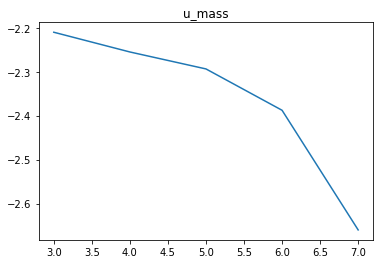

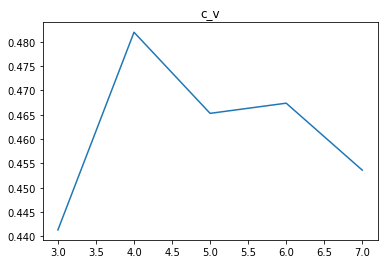

In [ ]:
dictionary = corpora.Dictionary(r["td_toks"])
dictionary.filter_extremes(no_below=2, no_above=0.8)

dtm = [dictionary.doc2bow(d) for d in r["td_toks"]]
tfidf = models.TfidfModel(dtm)
dtm_tfidf = tfidf[dtm]

lda_umasses = []
lda_cvs = []

for n in np.arange(3, 8):
    lda = models.ldamodel.LdaModel(dtm, num_topics=n, id2word=dictionary, passes=5, chunksize=256,
                                          random_state=10)
    cm_umass = CoherenceModel(lda, dictionary=dictionary, corpus=dtm,
                              coherence='u_mass')  # u_mass:prefer the model close to 0
    cm_cv = CoherenceModel(lda, dictionary=dictionary, texts=r["td_toks"],
                            coherence='c_v')  # c_v: [0,1], prefer bigger value
    lda_umasses.append(cm_umass.get_coherence())
    lda_cvs.append(cm_cv.get_coherence())

fig, ax1 = plt.subplots(1)
fig, ax2 = plt.subplots(1)

# plot the data
ax1.title.set_text('u_mass')
ax1.plot(np.arange(3, 8), lda_umasses)
ax2.title.set_text('c_v')
ax2.plot(np.arange(3, 8), lda_cvs)

From the graphs above, 4 and 5 topics show relatively high c_v and u_mass closer to 1. Hence, we will try topic modelling with 4 and 5 topics.

In [ ]:
lda4 = models.ldamodel.LdaModel(dtm, num_topics=4, 
                              id2word = dictionary, passes=10,
                              chunksize=256,random_state=10)

print()
for topic in lda4.show_topics(10):
  print(topic)


(0, '0.042*"management" + 0.017*"helpful" + 0.016*"culture" + 0.014*"sale" + 0.013*"advice" + 0.013*"bank" + 0.012*"manager" + 0.010*"leadership" + 0.010*"ceo" + 0.010*"happiness"')
(1, '0.019*"n\'t" + 0.017*"zoom" + 0.016*"\'s" + 0.015*"get" + 0.011*"like" + 0.011*"make" + 0.010*"day" + 0.010*"time" + 0.008*"job" + 0.008*"care"')
(2, '0.019*"lot" + 0.019*"culture" + 0.019*"opportunity" + 0.019*"place" + 0.017*"product" + 0.015*"team" + 0.015*"grow" + 0.014*"growth" + 0.013*"learn" + 0.010*"environment"')
(3, '0.033*"balance" + 0.031*"environment" + 0.028*"hour" + 0.028*"life" + 0.027*"benefit" + 0.021*"salary" + 0.021*"pay" + 0.020*"nice" + 0.019*"long" + 0.017*"friendly"')


In [ ]:
lda5 = models.ldamodel.LdaModel(dtm, num_topics=5, 
                              id2word = dictionary, passes=10,
                              chunksize=256,random_state=10)

print()
for topic in lda5.show_topics(10):
  print(topic)


(0, '0.029*"sale" + 0.021*"ceo" + 0.020*"happiness" + 0.020*"helpful" + 0.015*"none" + 0.015*"system" + 0.015*"..." + 0.013*"far" + 0.012*"feedback" + 0.012*"experience"')
(1, '0.023*"n\'t" + 0.021*"zoom" + 0.018*"\'s" + 0.018*"get" + 0.012*"day" + 0.012*"like" + 0.011*"make" + 0.011*"time" + 0.009*"really" + 0.009*"job"')
(2, '0.034*"career" + 0.027*"opportunity" + 0.017*"growth" + 0.015*"slow" + 0.013*"training" + 0.012*"experience" + 0.012*"staff" + 0.012*"progression" + 0.011*"project" + 0.011*"job"')
(3, '0.035*"balance" + 0.035*"environment" + 0.030*"hour" + 0.030*"life" + 0.029*"benefit" + 0.023*"pay" + 0.023*"salary" + 0.022*"nice" + 0.021*"bank" + 0.021*"long"')
(4, '0.024*"culture" + 0.023*"management" + 0.019*"team" + 0.014*"product" + 0.012*"lot" + 0.012*"grow" + 0.011*"place" + 0.011*"change" + 0.010*"leadership" + 0.009*"many"')


In [ ]:
import pyLDAvis.gensim
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda5, dtm, dictionary)
pyLDAvis.display(LDAvis_prepared)

From the topic modelling, we can see other topics that are important as well. For instance, Zoom appears to be important in bubble 2 above, while career and growth features heavily in bubble 4 above. We will ignore bubble 2 because Zoom is important due to our year in pandemic, but generally shouldn't be a criteria in job search. With this, our final 6 topics we will focus on are:
If we look at the WordCloud, we can roughly deduce there are six main topics:

1.   Management: Feedback about the bosses/supervisors
2.   Culture: On the people / customs / habits in the organisation
3.   Environment: On the place/systems in place
4.   Balance: On work-life balance
5.   Pay: On salary or benefits 
6.   Growth: On whether there is career progression

Given the top 300 frequent words and their hyponyms, and the six main topics, we can deduce these are the aspect words. These will be used later for sentiment mining. 


In [ ]:
aspect = {
    "management": ["management", "administration", "steering", "authority", 
                   "oversight", "mismanagement", "supervis", "manager", 
                   "director", "senior", "review", "appraisal", "assess", 
                  "help", "clear", "communication", 
                  "supportive", "ceo", "meeting", "boss", "reassur", "approv",
                   "recognize", "recognise", "board", "superior", "headquarter"],
    "culture": ["culture", "team", "staff", "colleague", "friendly", "senior", 
              "fast", "slow", "help", "politic", "fun", "competitive", 
              "young", "pace", "smart", "talent", "organization", 
              "organisation", "communication", "clear", "supportive", "old", 
              "meeting", "fresh", "innovat", "morale", "conference",
              "office", "crew", "toxic", "speed", "prompt", "bureaucracy",
              "civil service", "public service", "personnel", "department",
              "profit", "government", "autonomy", "melting"],
    "pay": ["pay", "salary", "benefit", "bonus", "progression", "promotion", 
          "compensation", "perk", "reward", "package", "wage", "bonus", 
          "insurance", "bucks", "budget", "cash"],
    "growth": ["opportunity", "learn", "career", "growth", "grow", "training", 
             "progression", "promotion", "skill", "exposure", "performance", 
             "talent", "promote", "stable", "money", "profession", "achievement",
             "routine"],
    "balance": ["balance", "time", "hour", "life", "flexible", "free", 
               "family", "load", "flexibility", "home", "stress",
              "stable", "pressure", "meeting", "shift", "conference", "leave"],
    "environment": ["environment", "place", "office", "tech", "system", 
                  "fun", "location", "food", "resource", "local", 
                  "global", "atmosphere", "innovation", "work", "surround",
                  "traffic", "intelligen", "automat", "town", "home", "convenien",
                  "comfort"]
}

In [ ]:
from itertools import chain


ss = wordnet.synsets('resource')
for n in range(len(ss)):
  hyps = list(set(
                  [w for s in ss[n].closure(lambda s: s.hyponyms())
                          for w in s.lemma_names()]))
  print(hyps)

['livelihood', 'living', 'land_resources', 'mineral_resources', 'natural_resources', 'amenities', 'bread_and_butter', 'financial_support', 'sustenance', 'comforts', 'renewable_resource', 'funding', 'natural_resource', 'financial_backing', 'meal_ticket', 'labor_resources', 'subsistence', 'support', 'ways_and_means', 'backing', 'conveniences', 'keep', 'creature_comforts', 'maintenance']
['assistance', 'refuge', 'aid', 'help', 'resourcefulness', 'recourse', 'inner_resource', 'resort', 'shadow']
['armoury', 'inventory', 'armory']
